# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

# Import libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:


df_flights = pd.read_csv('data/flights.csv')
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Data Cleaning

## Null values

In [3]:
# Null values
df_flights_null = df_flights.isnull().sum()
df_flights_null

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [4]:
# Slice of dataframe where "DepDel15" has null values
df_flights[df_flights['DepDel15'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [5]:
# Grouping null values in "DepDel15" by "DepDelay"
df_flights[df_flights['DepDel15'].isnull()].groupby('DepDelay').size()

DepDelay
0    2761
dtype: int64

In [6]:
# Grouping values on "DepDelay" by "DepDel15"
df_flights.groupby('DepDel15')[['DepDelay']].count()

,DepDelay
DepDel15,
0.0,215038
1.0,54141


In [7]:
# Grouping dataframe where "DepDel15" = 0 by DepDelay
df_flights[df_flights['DepDel15'] == 0].groupby('DepDelay').size()

DepDelay
-63        1
-52        1
-35        1
-27        1
-24        4
-23        3
-22        3
-21       12
-20       26
-19       33
-18       51
-17       91
-16      156
-15      275
-14      400
-13      697
-12     1123
-11     1717
-10     3818
-9      4969
-8      7168
-7     10478
-6     13785
-5     18495
-4     19430
-3     20322
-2     19754
-1     18073
 0     16521
 1      8724
 2      6727
 3      5695
 4      4925
 5      4511
 6      4130
 7      3649
 8      3380
 9      3075
 10     2983
 11     2667
 12     2551
 13     2380
 14     2233
dtype: int64

Every record that has a null value on "DepDel15" has a zero value on "DepDelay", which means that there was no delay on departure. The null values are probably just a mistake.

In [8]:
# Replace null values with 0 on "DepDel15"
df_flights['DepDel15'] = df_flights['DepDel15'].fillna(0)
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


In [9]:
# Verifying replacement of null values
df_flights[df_flights['DepDel15'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


## Outliers

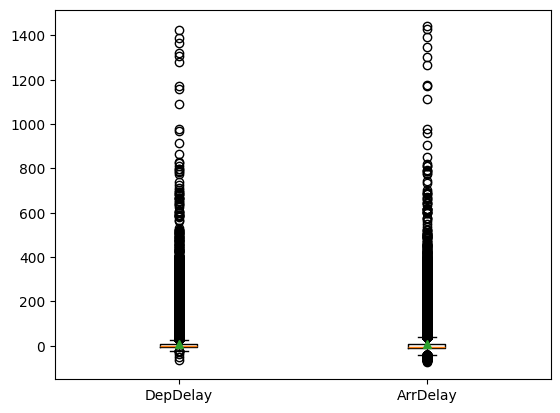

In [10]:
# Visualizing outliers on "DepDelay" and "ArrDelay"
plt.boxplot(
    x = df_flights[
        ['DepDelay', 'ArrDelay']
    ],
    showmeans = True
)
plt.xticks(
    [1, 2],
    labels = ['DepDelay', 'ArrDelay']
)
plt.show()

In [11]:
# Statistics for "DepDelay"
df_flights['DepDelay'].describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

In [12]:
# Statistics for "DepDelay"
df_flights['ArrDelay'].describe()

count    271940.000000
mean          6.496650
std          38.230331
min         -75.000000
25%         -11.000000
50%          -3.000000
75%          10.000000
max        1440.000000
Name: ArrDelay, dtype: float64

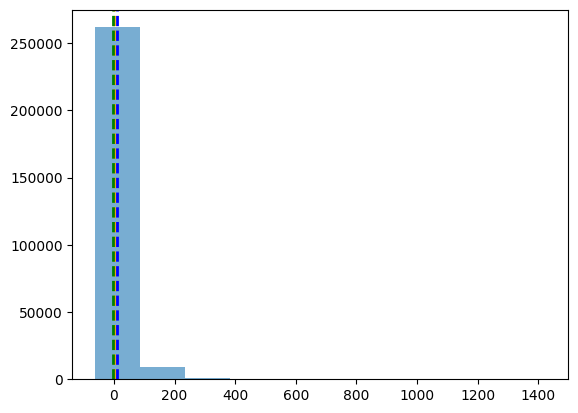

In [13]:
# Histogram for "DepDelay"
plt.hist(
    df_flights['DepDelay'],
    alpha = 0.6
)
# Mean
plt.axvline(
    df_flights['DepDelay'].mean(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)
# Median
plt.axvline(
    df_flights['DepDelay'].median(),
    color = 'orange',
    linestyle = 'dashed',
    linewidth = 2
)
# Mode
plt.axvline(
    df_flights['DepDelay'].mode()[0],
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)
plt.show()

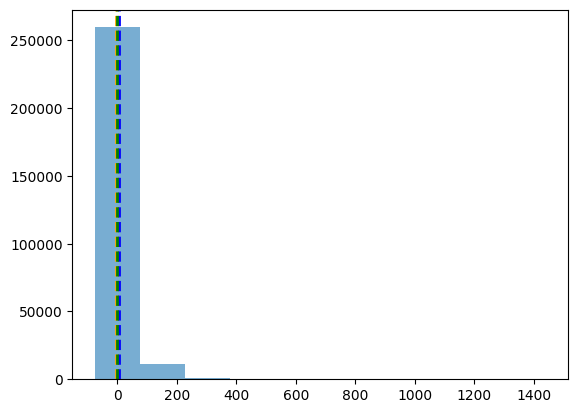

In [14]:
# Histogram for "ArrDelay"
plt.hist(
    df_flights['ArrDelay'],
    alpha = 0.6
)
# Mean
plt.axvline(
    df_flights['ArrDelay'].mean(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)
# Median
plt.axvline(
    df_flights['ArrDelay'].median(),
    color = 'orange',
    linestyle = 'dashed',
    linewidth = 2
)
# Mode
plt.axvline(
    df_flights['ArrDelay'].mode()[0],
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)
plt.show()

### Quartiles

In [16]:
# DepDelay
q1_depdelay, q3_depdelay = df_flights['DepDelay'].quantile(
    [0.25, 0.75]
)
q1_depdelay, q3_depdelay

(-4.0, 9.0)

In [17]:
# ArrDelay
q1_arrdelay, q3_arrdelay = df_flights['ArrDelay'].quantile(
    [0.25, 0.75]
)
q1_arrdelay, q3_arrdelay

(-11.0, 10.0)

### Outliers elimination

In [18]:
# DepDelay
df_flights = df_flights[
    (df_flights['DepDelay'] > q1_depdelay) &
    (df_flights['DepDelay'] < q3_depdelay)
]
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271928,2013,4,14,7,WN,13495,Louis Armstrong New Orleans International,New Orleans,LA,11259,Dallas Love Field,Dallas,TX,1905,-1,0.0,2035,-6,0,0
271929,2013,9,9,1,DL,14869,Salt Lake City International,Salt Lake City,UT,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,1655,0,0.0,2232,-6,0,0
271931,2013,7,5,5,WN,15304,Tampa International,Tampa,FL,10529,Bradley International,Hartford,CT,1100,2,0.0,1350,-10,0,0
271932,2013,8,26,1,WN,11292,Denver International,Denver,CO,12191,William P Hobby,Houston,TX,1855,-2,0.0,2215,0,0,0


In [19]:
# ArrDelay
df_flights = df_flights[
    (df_flights['ArrDelay'] > q1_arrdelay) &
    (df_flights['ArrDelay'] < q3_arrdelay)
]
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
10,2013,6,9,7,OO,12892,Los Angeles International,Los Angeles,CA,14679,San Diego International,San Diego,CA,1404,3,0.0,1507,-8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271927,2013,9,27,5,WN,13495,Louis Armstrong New Orleans International,New Orleans,LA,11259,Dallas Love Field,Dallas,TX,1420,-2,0.0,1540,-10,0,0
271928,2013,4,14,7,WN,13495,Louis Armstrong New Orleans International,New Orleans,LA,11259,Dallas Love Field,Dallas,TX,1905,-1,0.0,2035,-6,0,0
271929,2013,9,9,1,DL,14869,Salt Lake City International,Salt Lake City,UT,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,1655,0,0.0,2232,-6,0,0
271931,2013,7,5,5,WN,15304,Tampa International,Tampa,FL,10529,Bradley International,Hartford,CT,1100,2,0.0,1350,-10,0,0


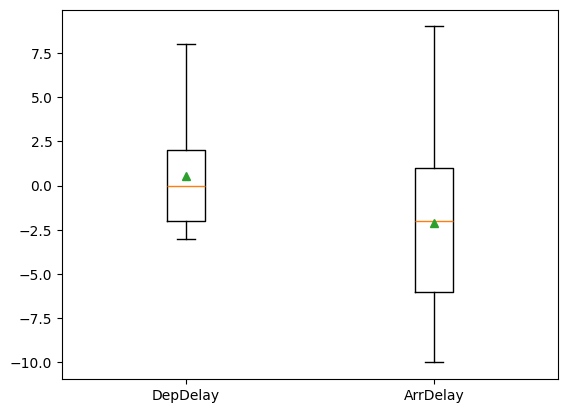

In [20]:
# Visualizing new distributions
plt.boxplot(
    x = df_flights[
        ['DepDelay', 'ArrDelay']
    ],
    showmeans = True
)
plt.xticks(
    [1, 2],
    labels = ['DepDelay', 'ArrDelay']
)
plt.show()

In [21]:
# Statistics for "DepDelay"
df_flights['DepDelay'].describe()

count    75778.000000
mean         0.552020
std          3.030732
min         -3.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max          8.000000
Name: DepDelay, dtype: float64

In [22]:
# Statistics for "DepDelay"
df_flights['ArrDelay'].describe()

count    75778.000000
mean        -2.089789
std          5.108283
min        -10.000000
25%         -6.000000
50%         -2.000000
75%          1.000000
max          9.000000
Name: ArrDelay, dtype: float64

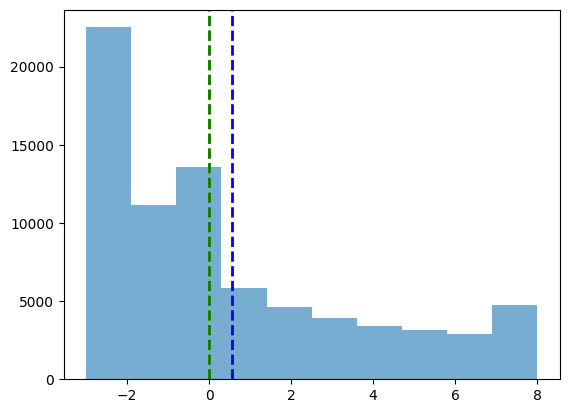

In [23]:
# Histogram for "DepDelay"
plt.hist(
    df_flights['DepDelay'],
    alpha = 0.6
)
# Mean
plt.axvline(
    df_flights['DepDelay'].mean(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)
# Median
plt.axvline(
    df_flights['DepDelay'].median(),
    color = 'orange',
    linestyle = 'dashed',
    linewidth = 2
)
# Mode
plt.axvline(
    df_flights['DepDelay'].mode()[0],
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)
plt.show()

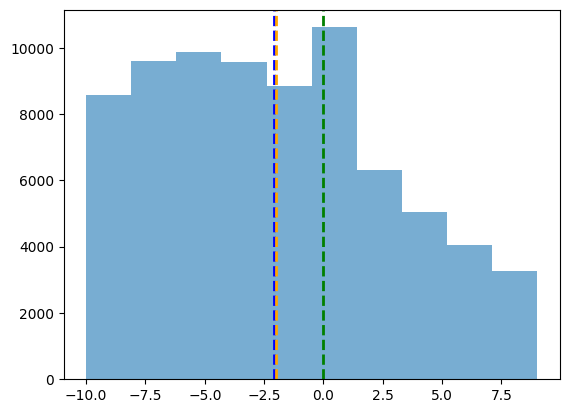

In [24]:
# Histogram for "ArrDelay"
plt.hist(
    df_flights['ArrDelay'],
    alpha = 0.6
)
# Mean
plt.axvline(
    df_flights['ArrDelay'].mean(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)
# Median
plt.axvline(
    df_flights['ArrDelay'].median(),
    color = 'orange',
    linestyle = 'dashed',
    linewidth = 2
)
# Mode
plt.axvline(
    df_flights['ArrDelay'].mode()[0],
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)
plt.show()

# Data exploration